In [1]:
##Import liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
data= pd.read_csv('BankNoteAuthentication.csv', header= None)

In [3]:
#print top five rows for general info
data.head()

,0,1,2,3,4
0,3.62160,,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.4621,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.5944,0
4,0.32924,-4.4552,4.5718,-0.9888,0


In [4]:
data.describe()

,0,4
count,1372.000000,1372.000000
mean,0.433735,0.444606
std,2.842763,0.497103
min,-7.042100,0.000000
25%,-1.773000,0.000000
50%,0.496180,0.000000
75%,2.821475,1.000000
max,6.824800,1.000000


In [5]:
#Check for data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   object 
 2   2       1372 non-null   object 
 3   3       1372 non-null   object 
 4   4       1372 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 53.7+ KB


In [6]:
#Rename columns
data.columns=['variance', 'skewness', 'curtosis', 'entropy', 'class']

In [7]:
#Print top 5 rows for analysis
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.4621,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.5944,0
4,0.32924,-4.4552,4.5718,-0.9888,0


In [8]:
#x= data.drop(columns= ['class'])
#y= data['class']

In [9]:
#x.head()

In [10]:
#c = (data['skewness'] == '  ').sum()
#print(c)
#d = (data['skewness'] == '  ')

In [11]:
#Replacing blank space with NaN
data_with_NaN= data.replace(r'^\s*$', np.nan, regex=True)

In [12]:
#No of NaN values in each columns
data_with_NaN.isna().sum()

variance     0
skewness    14
curtosis    21
entropy      4
class        0
dtype: int64

In [13]:
#Drop rows with missing values
final_data= data_with_NaN.dropna()

In [14]:
final_data.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 1 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1333 non-null   float64
 1   skewness  1333 non-null   object 
 2   curtosis  1333 non-null   object 
 3   entropy   1333 non-null   object 
 4   class     1333 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 62.5+ KB


In [17]:
#convert all the data types to int
final_data= final_data.astype('float')

In [18]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 1 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1333 non-null   float64
 1   skewness  1333 non-null   float64
 2   curtosis  1333 non-null   float64
 3   entropy   1333 non-null   float64
 4   class     1333 non-null   float64
dtypes: float64(5)
memory usage: 62.5 KB


In [19]:
final_data.head()

,variance,skewness,curtosis,entropy,class
1,4.54590,8.1674,-2.4586,-1.46210,0.0
2,3.86600,-2.6383,1.9242,0.10645,0.0
3,3.45660,9.5228,-4.0112,-3.59440,0.0
4,0.32924,-4.4552,4.5718,-0.98880,0.0
5,4.36840,9.6718,-3.9606,-3.16250,0.0


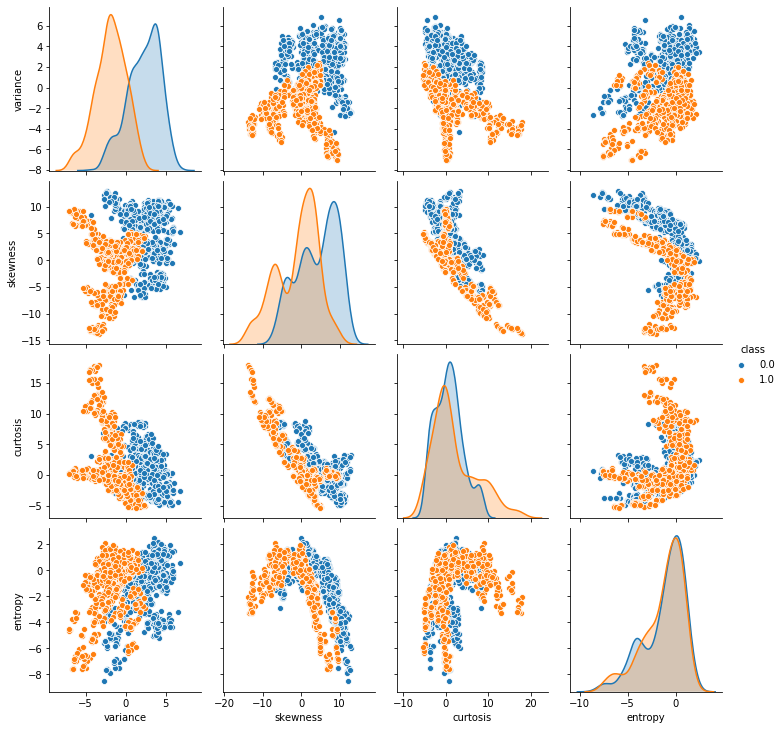

In [20]:
#for more info ploting each features with target 'class'
sns.pairplot(final_data, hue= 'class')
plt.show()

In [21]:
#sepatrate the dependendent and target variable
x= final_data.drop(columns= ['class'])
y= final_data['class']

In [22]:
x.shape

(1333, 4)

In [23]:
y.shape

(1333,)

In [24]:
#import liberary to split training ant test data
from sklearn.model_selection import train_test_split

In [25]:
#separate training data and test data
x_train, x_test ,y_train,  y_test = train_test_split(x,y, test_size=0.2, random_state= 0)

In [26]:
x_train.shape

(1066, 4)

In [27]:
x_test.shape

(267, 4)

In [28]:
y_train.shape

(1066,)

In [29]:
x_train.head()

,variance,skewness,curtosis,entropy
588,-0.27802,8.18810,-3.1338,-2.52760
1302,-2.57240,-0.95602,2.7073,-0.16639
55,4.82650,0.80287,1.6371,1.18750
1193,-3.75730,-8.29160,10.3032,0.38059
1297,-2.16740,0.12415,-1.0465,-0.86208


In [30]:
y_train.head()

588     0.0
1302    1.0
55      0.0
1193    1.0
1297    1.0
Name: class, dtype: float64

In [31]:
#Apply decission tree algorithm to train our data
from sklearn.tree import DecisionTreeClassifier
Classifier= DecisionTreeClassifier()
Classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
#Predict test result
y_pred= Classifier.predict(x_test)

In [33]:
#check accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred)

In [34]:
score

0.9962546816479401

In [35]:
#cross validation to ensure our model is correct
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Classifier, x, y, cv=5)

In [36]:
scores

array([0.99625468, 0.96629213, 0.97752809, 0.9924812 , 0.98496241])

In [37]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.02)
